In [2]:
# Initialize Otter
import otter
grader = otter.Notebook("check_matrices.ipynb")

# Instructions

Overview slides are here https://docs.google.com/presentation/d/1nTexr-lPdkq3HW4ouzYTa9iEiO-6K7j5ihHvZqixIsM/edit?usp=sharing

Slides specific to this assignment are here: https://docs.google.com/presentation/d/1iTi45y5AghMZRgStPX4mPdR7uYFQdRBjaekOW7ESTxM/edit?usp=sharing
You will be editing matrix_transforms.py for this assignment

This is just setting up (and analyzing) 2 dimensional matrices (rotation, translation, scaling).

In [3]:
# Doing the imports for you
import numpy as np
import matplotlib.pyplot as plt

# Since we need so many of the functions in matrix_transforms, I'm using this style of import. Anything with
# an mt. in front of it comes from matrix_transforms.py
import matrix_transforms as mt

# These commands will force JN to actually re-load the external file when you re-execute this import command
%load_ext autoreload
%autoreload 2

# Get rid of annoying exponentials
np.set_printoptions(precision=2, suppress='True')

# Making matrices 
This bit of code checks that the make_x_matrix routines (and their corresponding get_x_ routines) are working.

You shouldn't have to edit any of this code; just the functions in matrix_transforms.py.

_Type your answer here, replacing this text._

In [4]:
# Should have 0.1 in the upper right corner, with 0.2 in the next row down
mat_trans = mt.make_translation_matrix(0.1, 0.2)
print(f"Matrix:\n{mat_trans}\nMatrix shape:{mat_trans.shape}")
assert(mat_trans.shape == (3, 3))

Matrix:
[[1.  0.  0.1]
 [0.  1.  0.2]
 [0.  0.  1. ]]
Matrix shape:(3, 3)


In [5]:
# Should have 0.1 then 0.2 on the diagonal
mat_scale = mt.make_scale_matrix(0.1, 0.2)
print(f"Matrix:\n{mat_scale}\nMatrix shape:{mat_scale.shape}")
assert(mat_scale.shape == (3, 3))

Matrix:
[[0.1 0.  0. ]
 [0.  0.2 0. ]
 [0.  0.  1. ]]
Matrix shape:(3, 3)


In [6]:
# Should have 0.866 on the diagonal, -0.5 and 0.5 on the off-axis
mat_rot = mt.make_rotation_matrix(np.pi / 6.0)
print(f"Matrix:\n{mat_rot}\nMatrix shape:{mat_rot.shape}")
assert(mat_rot.shape == (3, 3))

Matrix:
[[ 0.87 -0.5   0.  ]
 [ 0.5   0.87  0.  ]
 [ 0.    0.    1.  ]]
Matrix shape:(3, 3)


In [7]:
# Get back out what you put in
dx = 0.1
dy = 0.2
mat_trans = mt.make_translation_matrix(dx, dy)
dx_back, dy_back = mt.get_dx_dy_from_matrix(mat_trans)
print(f"Got back {dx_back}, {dy_back}")
assert(np.isclose(dx, dx_back))
assert(np.isclose(dy, dy_back))

Got back 0.1, 0.2


In [8]:
# Get back out what you put in
sx = 0.1
sy = 0.2
mat_scale = mt.make_scale_matrix(sx, sy)
sx_back, sy_back = mt.get_sx_sy_from_matrix(mat_scale)
print(f"Got back {sx_back}, {sy_back}")
assert(np.isclose(sx, sx_back))
assert(np.isclose(sy, sy_back))

Got back 0.1, 0.2


In [9]:
# Get back out what you put in
theta = np.pi / 2.0
mat_rot = mt.make_rotation_matrix(theta)

v_new_x, v_new_y = mt.get_axes_from_matrix(mat_rot)
print(f"Got back vec {v_new_x} and {v_new_y}")

vec_expected_x = np.array([0.0, 1.0])
vec_expected_y = np.array([-1.0, 0.0])
assert(np.all(np.isclose(v_new_x, vec_expected_x)))
assert(np.all(np.isclose(v_new_y, vec_expected_y)))

theta_back = mt.get_theta_from_matrix(mat_rot)
print(f"Sent {theta} got back {theta_back}")
assert(np.isclose(theta, theta_back))

Got back vec [0. 1.] and [-1.  0.]
Sent 1.5707963267948966 got back 1.5707963267948966


In [15]:
# Call each of the test routines in turn
mt.test_matrices()

True

In [29]:
grader.check("making_matrices")

making_matrices results:
    making_matrices - 1 result:
        ❌ Test case failed
        Trying:
            assert(mt.test_matrices())
        Expecting nothing
        **********************************************************************
        Line 1, in making_matrices 0
        Failed example:
            assert(mt.test_matrices())
        Exception raised:
            Traceback (most recent call last):
              File "c:\Users\Keegan\AppData\Local\Programs\Python\Python310\lib\doctest.py", line 1348, in __run
                exec(compile(example.source, filename, "single",
              File "<doctest making_matrices 0[0]>", line 1, in <module>
                assert(mt.test_matrices())
              File "c:\Users\Keegan\Documents\introrob\ROB514\Skills\matrix_transforms.py", line 349, in test_matrices
                test_rotation_matrix()
              File "c:\Users\Keegan\Documents\introrob\ROB514\Skills\matrix_transforms.py", line 337, in test_rotation_matrix
                raise ValueError("Rotation matrix not orthonormal {theta}, {mat}")
            ValueError: Rotation matrix not orthonormal {theta}, {mat}

# Check matrices
These are the checks you need to make sure your matrices are what you expect they are (angle-preserving, no mirroring). 

These are the check_x routines in matrix_transforms.py. Note that this is just test_checks pulled apart into each check call. You don't have to change any of this code; see the slides for what this should output

In [47]:
mat_not_orthonormal = np.identity(3)
mat_not_orthonormal[0, 0] = 2.0
if mt.check_is_rotation(mat_not_orthonormal, b_print=True):
    raise ValueError(f"Matrix {mat_not_orthonormal} is not orthonormal, should fail length check")

2.0
1.0
0.0


In [48]:
mat_not_orthonormal = np.identity(3)

mat_not_orthonormal[1, 1] = np.sqrt(1.0 - 0.1 * 0.1)
mat_not_orthonormal[1, 0] = 0.1

if mt.check_is_rotation(mat_not_orthonormal, True):
    raise ValueError(f"Matrix {mat_not_orthonormal} is not orthonormal, should fail orthogonal check")

1.004987562112089
0.99498743710662
0.099498743710662


In [22]:
mat_mirrored = mt.make_scale_matrix(2.0, -1.2)
if not mt.check_is_mirrored(mat_mirrored):
    raise ValueError(f"Matrix {mat_mirrored} is mirrored")

In [23]:
mat_skewed = mt.make_scale_matrix(2.0, 1.2) @ mt.make_rotation_matrix(0.25)
if mt.check_preserves_angles(mat_skewed):
    raise ValueError(f"Matrix {mat_skewed} does NOT preserve angles")

In [24]:
mat_is_ok = mt.make_rotation_matrix(np.pi/3.0) @ mt.make_translation_matrix(0.2, -0.3) @ mt.make_rotation_matrix(-np.pi/2.0) @ mt.make_scale_matrix(0.2, 2.0)
if mt.check_is_mirrored(mat_is_ok):
    raise ValueError(f"Matrix {mat_is_ok} is NOT mirrored")
if not mt.check_preserves_angles(mat_is_ok):
    raise ValueError(f"Matrix {mat_is_ok} is angle-preserving")
if mt.check_is_rotation(mat_is_ok):
    raise ValueError(f"Matrix {mat_is_ok} is NOT orthonormal")


In [46]:
mat_is_ortho = mt.make_rotation_matrix(np.pi/3.0) @ mt.make_translation_matrix(0.2, -0.3) @ mt.make_rotation_matrix(-np.pi/2.0)
if not mt.check_is_rotation(mat_is_ortho):
    raise ValueError(f"Matrix {mat_is_ortho} is orthonormal")

1.3152946437965904
1.2369316876852983
0.6299999999999999


ValueError: Matrix [[ 0.87  0.5   0.36]
 [-0.5   0.87  0.02]
 [ 0.    0.    1.  ]] is orthonormal

In [43]:
grader.check("check_matrices")

check_matrices results:
    check_matrices - 1 result:
        ❌ Test case failed
        Trying:
            assert(mt.test_checks())
        Expecting nothing
        **********************************************************************
        Line 1, in check_matrices 0
        Failed example:
            assert(mt.test_checks())
        Exception raised:
            Traceback (most recent call last):
              File "c:\Users\Keegan\AppData\Local\Programs\Python\Python310\lib\doctest.py", line 1348, in __run
                exec(compile(example.source, filename, "single",
              File "<doctest check_matrices 0[0]>", line 1, in <module>
                assert(mt.test_checks())
              File "c:\Users\Keegan\Documents\introrob\ROB514\Skills\matrix_transforms.py", line 391, in test_checks
                raise ValueError(f"Matrix {mat_is_ortho} is orthonormal")
            ValueError: Matrix [[ 0.87  0.5   0.36]
             [-0.5   0.87  0.02]
             [ 0.    0.    1.  ]] is orthonormal

<!-- BEGIN QUESTION -->

# Set up the XY matrix for drawing

Edit make_matrix_from_sequence to actually build a matrix sequence.
Edit make_pts_representing_circle to make a matrix representing the points on the circle,
Edit plot_axes_and_circle to create the XY vertices/geometry for drawing a circle.
Note that I'm using make_matrix_from_sequence for these examples; it will call the mak

In [26]:
# Check syntax of call
seq_rot_trans = [{"type":"rotate", "theta": np.pi/4.0},
                 {"type":"translate", "dx": 1, "dy": 2}]

mat = mt.make_matrix_from_sequence(seq_rot_trans)
print(f"Matrix:\n{mat}")

Matrix:
[[ 0.71 -0.71  1.  ]
 [ 0.71  0.71  2.  ]
 [ 0.    0.    1.  ]]


In [30]:
# Check syntax of call
pts = mt.make_pts_representing_circle(25)
print(pts)
assert(pts.shape == (3, 25))

[[ 1.    0.97  0.87  0.71  0.5   0.26  0.   -0.26 -0.5  -0.71 -0.87 -0.97
  -1.   -0.97 -0.87 -0.71 -0.5  -0.26 -0.    0.26  0.5   0.71  0.87  0.97
   1.  ]
 [ 0.    0.26  0.5   0.71  0.87  0.97  1.    0.97  0.87  0.71  0.5   0.26
   0.   -0.26 -0.5  -0.71 -0.87 -0.97 -1.   -0.97 -0.87 -0.71 -0.5  -0.26
  -0.  ]
 [ 1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
   1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
   1.  ]]


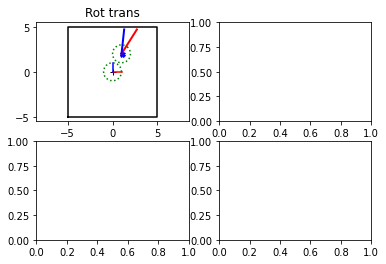

In [39]:
# Syntax/draws correctly check (just one plot)
fig, axs = plt.subplots(2, 2)


axs[0, 0].set_title("Rot trans")
mt.plot_axes_and_circle(axs[0, 0], mat)

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

# Order matters
Edit example_order_matters() to create the plot shown in the slides.

Which one of these four transformations is NOT angle-preserving? Why?

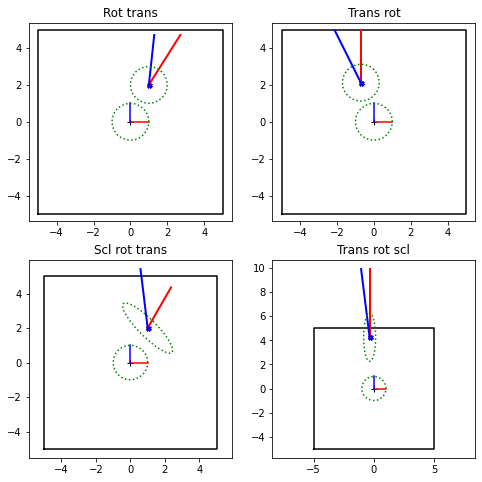

In [49]:
mt.example_order_matters()

In [50]:
# Edit this line of code
print("Trans rot sci is not angle preserving as we are scaling after everything else.")

Trans rot sci is not angle preserving as we are scaling after everything else.


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

# Mirroring and skewing
In this problem, edit example_weird_geometry to create a mirror and a non-angle preserving matrix. The slides show the ones I made; there are an infinite number of choices. 

In [ ]:
mt.example_weird_geometry()

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

# Geometry is NOT centered around the origin
Edit example_uncentered_geometry to create versions of the circle and the zigzag that are in other configurations.
- Put the orgin in the lower left (-1, -1), rather than the center. This is a pretty common placement.
- Orient so that the "up" direction is no longer the y-axis, but is the x-axis. 
- Do both

The matrix transformation applied to the geometry is the SAME for all of these plots - it's represented by the red,blue lines. It's just the geometry that has moved.

In [ ]:
mt.example_uncentered_geometry()

<!-- END QUESTION -->

## Hours and collaborators
Required for every assignment - fill out before you hand-in.

Listing names and websites helps you to document who you worked with and what internet help you received in the case of any plagiarism issues. You should list names of anyone (in class or not) who has substantially helped you with an assignment - or anyone you have *helped*. You do not need to list TAs.

Listing hours helps us track if the assignments are too long.

In [ ]:

# List of names (creates a set)
worked_with_names = {"not filled out"}
# List of URLS (creates a set)
websites = {"not filled out"}
# Approximate number of hours, including lab/in-class time
hours = -1.5

# for all row, column in all_indices_from_where
#.   if this is the column for wrist torque 
#.      print(f"Row: {r}, Time step: {c // n_time_steps} Successful y/n: {pick_data[r, -1] == 1}, value: {pick_data[r, c]}")

In [ ]:
grader.check("hours_collaborators")

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

Submit through gradescope, matrix transforms

In [ ]:
# Save your notebook first, then run this cell to export your submission.
grader.export(run_tests=True)